# Alzheimer Disease Dataset

#### **Dados analisados retirados em:**

https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data

#### **Equipe:**

Lívia Nobre;

Májda Alvarenga

# 1. Introdução



A doença de Alzheimer é uma das principais causas de demência em todo o mundo, afetando milhões de pessoas e representando um desafio significativo para sistemas de saúde e famílias. Compreender os fatores associados à doença e identificar padrões nos dados relacionados a pacientes podem fornecer insights importantes para diagnóstico precoce e gerenciamento.

Neste trabalho, utilizaremos um dataset sobre Alzheimer para conduzir análises exploratórias e aplicar técnicas de machine learning. O objetivo é identificar padrões, compreender as principais características dos dados e construir modelos preditivos que possam contribuir para o estudo e manejo dessa condição.


O dataset é composto pelas seguintes informações:

- **Informações do Paciente**
  - ID do Paciente
  - Detalhes Demográficos
  - Fatores de Estilo de Vida
- **Histórico Médico**
- **Medições Clínicas**
- **Avaliações Cognitivas e Funcionais**
- **Sintomas**
- **Informações de Diagnóstico**
- **Informações Confidenciais**


**Informações do Paciente**
- *PatientID*: Um identificador único atribuído a cada paciente (de 4751 a 6900).

**Detalhes Demográficos**

- *Age*: A idade dos pacientes, variando de 60 a 90 anos.
- *Gender*: Gênero dos pacientes, onde 0 representa Masculino e 1 representa Feminino.
- *Ethnicity*: A etnia dos pacientes, codificada da seguinte forma:

    0: Caucasiano

    1: Afro-americano

    2: Asiático

    3: Outro

- *EducationLevel*: O nível de educação dos pacientes, codificado da seguinte forma:

    0: Nenhum

    1: Ensino Médio

    2: Graduação

    3: Pós-graduação

**Fatores de Estilo de Vida**

- *BMI*: Índice de Massa Corporal dos pacientes, variando de 15 a 40.
- *Smoking*: Status de tabagismo, onde 0 indica Não e 1 indica Sim.
- *AlcoholConsumption*: Consumo semanal de álcool em unidades, variando de 0 a 20.
- *PhysicalActivity*: Atividade física semanal em horas, variando de 0 a 10.
- *DietQuality*: Pontuação de qualidade da dieta, variando de 0 a 10.
- *SleepQuality*: Pontuação de qualidade do sono, variando de 4 a 10.

**Histórico Médico**

- *FamilyHistoryAlzheimers*: Histórico familiar de Alzheimer, onde 0 indica Não e 1 indica Sim.
- *CardiovascularDisease*: Presença de doença cardiovascular, onde 0 indica Não e 1 indica Sim.
- *Diabetes*: Presença de diabetes, onde 0 indica Não e 1 indica Sim.
- *Depression*: Presença de depressão, onde 0 indica Não e 1 indica Sim.
- *HeadInjury*: Histórico de lesão na cabeça, onde 0 indica Não e 1 indica Sim.
- *Hypertension*: Presença de hipertensão, onde 0 indica Não e 1 indica Sim.

**Medições Clínicas**

- *SystolicBP*: Pressão arterial sistólica, variando de 90 a 180 mmHg.
- *DiastolicBP*: Pressão arterial diastólica, variando de 60 a 120 mmHg.
- *CholesterolTotal*: Níveis totais de colesterol, variando de 150 a 300 mg/dL.
- *CholesterolLDL*: Níveis de colesterol de lipoproteína de baixa densidade, variando de 50 a 200 mg/dL.
- *CholesterolHDL*: Níveis de colesterol de lipoproteína de alta densidade, variando de 20 a 100 mg/dL.
- *CholesterolTriglycerides*: Níveis de triglicerídeos, variando de 50 a 400 mg/dL.

**Avaliações Cognitivas e Funcionais**

- *MMSE*: Pontuação no Mini Exame do Estado Mental, variando de 0 a 30. Pontuações mais baixas indicam comprometimento cognitivo.
- *FunctionalAssessment*: Pontuação de avaliação funcional, variando de 0 a 10. Pontuações mais baixas indicam maior deficiência.
- *MemoryComplaints*: Presença de queixas de memória, onde 0 indica Não e 1 indica Sim.
- *BehavioralProblems*: Presença de problemas comportamentais, onde 0 indica Não e 1 indica Sim.
- *ADL*: Pontuação de Atividades de Vida Diária, variando de 0 a 10. Pontuações mais baixas indicam maior deficiência.

**Sintomas**

- *Confusion*: Presença de confusão, onde 0 indica Não e 1 indica Sim.
- *Disorientation*: Presença de desorientação, onde 0 indica Não e 1 indica Sim.
- *PersonalityChanges*: Presença de mudanças de personalidade, onde 0 indica Não e 1 indica Sim.
- *DifficultyCompletingTasks*: Presença de dificuldade em completar tarefas, onde 0 indica Não e 1 indica Sim.
- *Forgetfulness*: Presença de esquecimento, onde 0 indica Não e 1 indica Sim.
Informações de Diagnóstico

- *Diagnosis*: Status de diagnóstico para Alzheimer, onde 0 indica Não e 1 indica Sim.
Informações Confidenciais

- *DoctorInCharge*: Esta coluna contém informações confidenciais sobre o médico responsável, com o valor "XXXConfid" para todos os pacientes.


#### Bibliotecas e carregamento dos dados


In [ ]:
# Bibliotecas padrão
import os
import requests

# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para modelagem e pré-processamento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Modelos
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

# Explicabilidade do modelo
import shap

In [ ]:
df = pd.read_csv('/content/alzheimers_disease_data.csv', sep=",")

# Exibir o dataframe
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# 2. Análise Exploratória

#### Distribuição da variávei Diagnóstico

In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
0,1389
1,760


#### Verificação de valores nulos

In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


### Visualizações

As distribuições dos valores no dataset seguem um padrão previsível, já que são compostas principalmente por índices dentro de limites bem definidos. Essa consistência reflete a ausência de outliers, indicando que os dados estão dentro do intervalo esperado.

#### Distribuição de Idade, IMC e Atividade Física


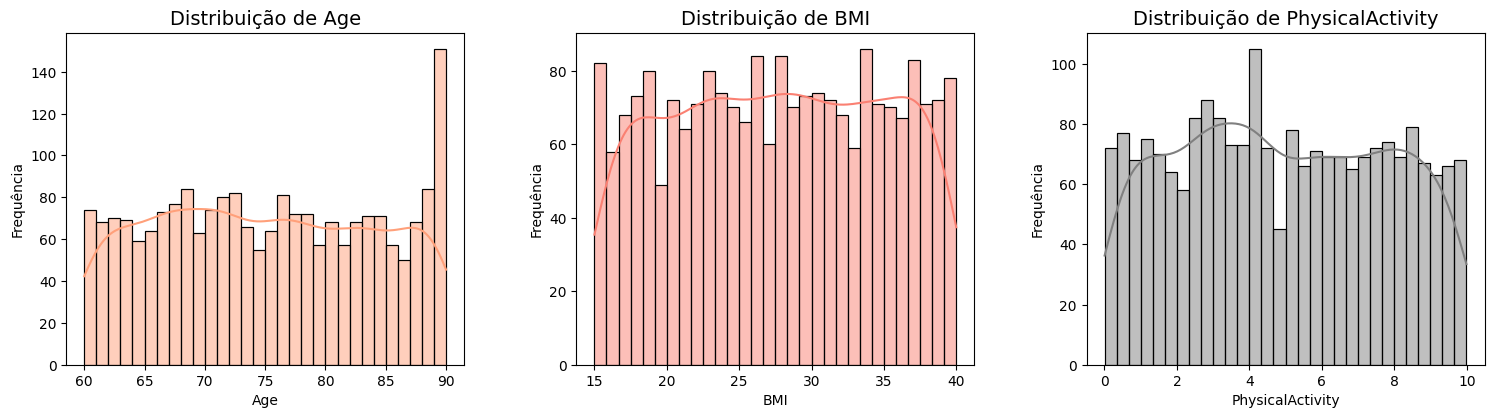

In [ ]:
variables = ['Age', 'BMI', 'PhysicalActivity']
colors = ['lightsalmon', 'salmon', 'gray']

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(16, 5))  # Grid em 1 linha e 3 colunas
fig.tight_layout(pad=5)  # Ajusta o espaçamento entre os gráficos

for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, color=colors[i], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var}', fontsize=14)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequência')
plt.show()

#### Boxplot das variáveis Gênero, Fumante e Histórico familiar de alzheimer


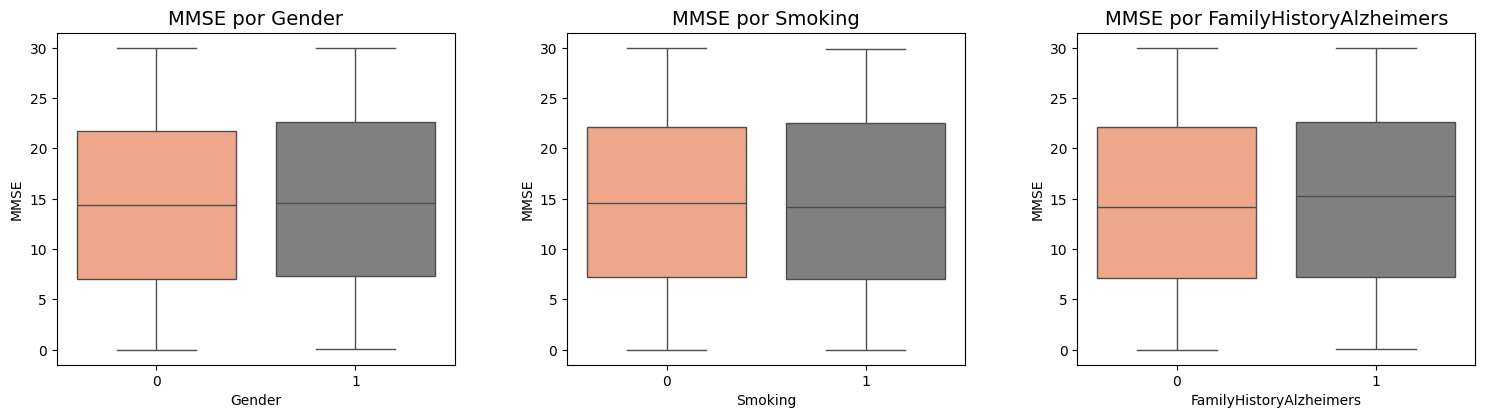

In [ ]:
categorical_vars = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers']
continuous_var = 'MMSE'
palette = {0: 'lightsalmon', 1: 'gray'}
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(16, 5))
fig.tight_layout(pad=5)

for i, var in enumerate(categorical_vars):
    sns.boxplot(data=df, x=var, y=continuous_var, palette = palette, hue=var, ax=axes[i], dodge=False)
    axes[i].set_title(f'{continuous_var} por {var}', fontsize=14)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(continuous_var)
    axes[i].legend_.remove()
plt.show()

#### Verificação de outliers


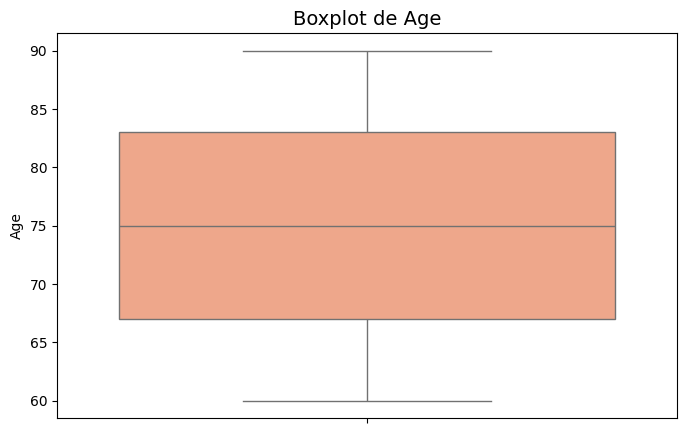

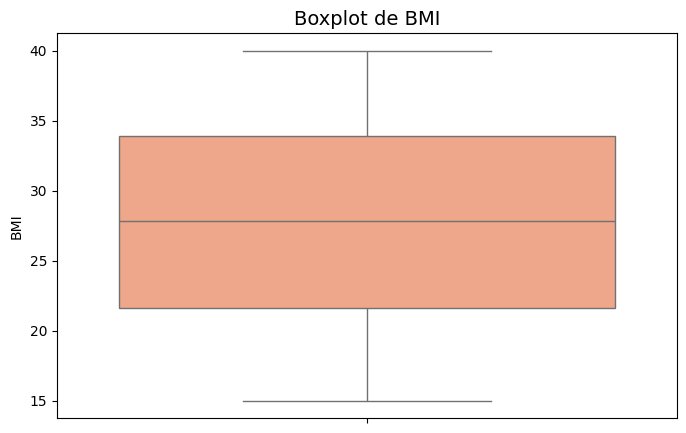

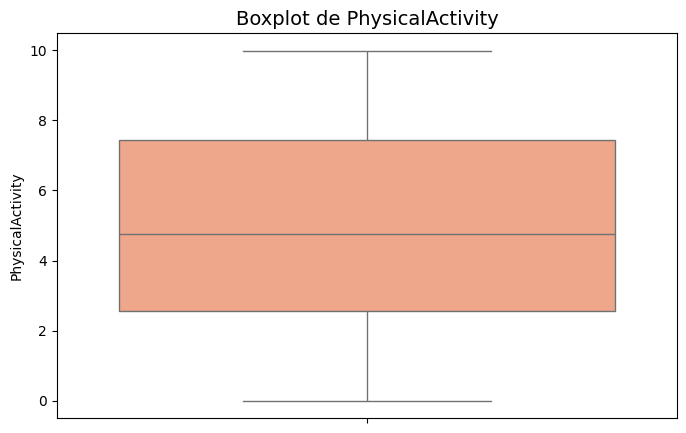

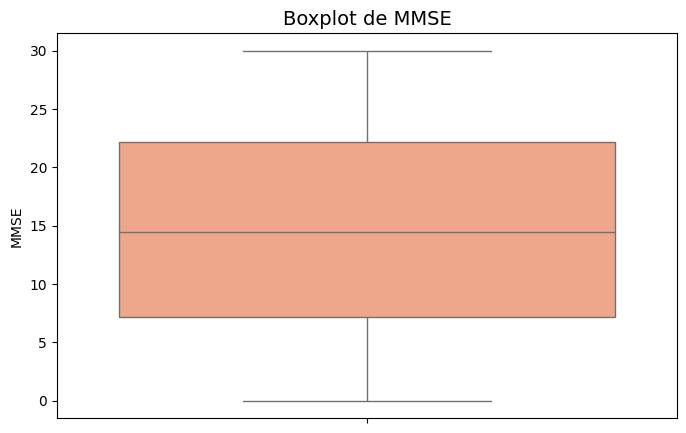

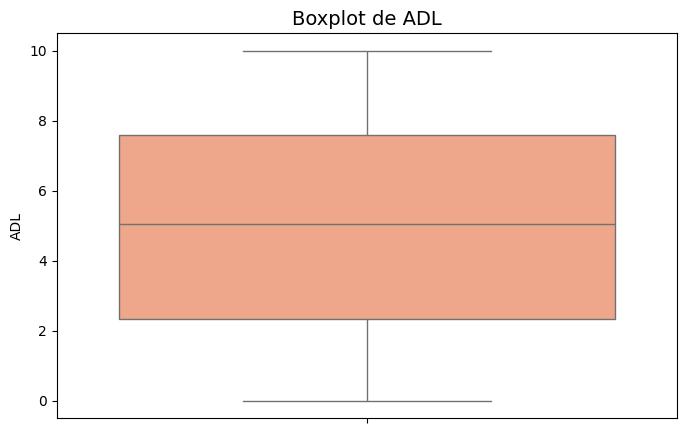

In [ ]:
variables = ['Age', 'BMI', 'PhysicalActivity', 'MMSE', 'ADL']

for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=var, color= 'lightsalmon')  # Lilás
    plt.title(f'Boxplot de {var}', fontsize=14)
    plt.ylabel(var)
    plt.show()

#### Distribuição de diagnóstico por idade

É possível ver que a proporção de idosos diagnosticados é quase a mesma para os dois últimos grupos de idade




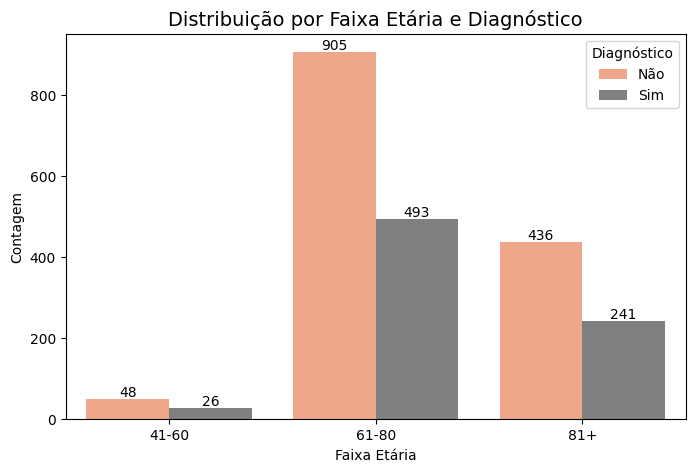

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 60, 80, 100], labels=['41-60', '61-80', '81+'])

palette = {0: 'lightsalmon', 1: 'gray'}

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='AgeGroup', hue='Diagnosis', palette=palette)
plt.title('Distribuição por Faixa Etária e Diagnóstico', fontsize=14)
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.legend(title='Diagnóstico', labels=['Não', 'Sim'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.show()

#### Distribuição de Variáveis por Diagnóstico de Alzheimer

Aqui é possível perceber que o sintoma que mais está atrelado a um diagnóstico positivo é o de esquecimento.

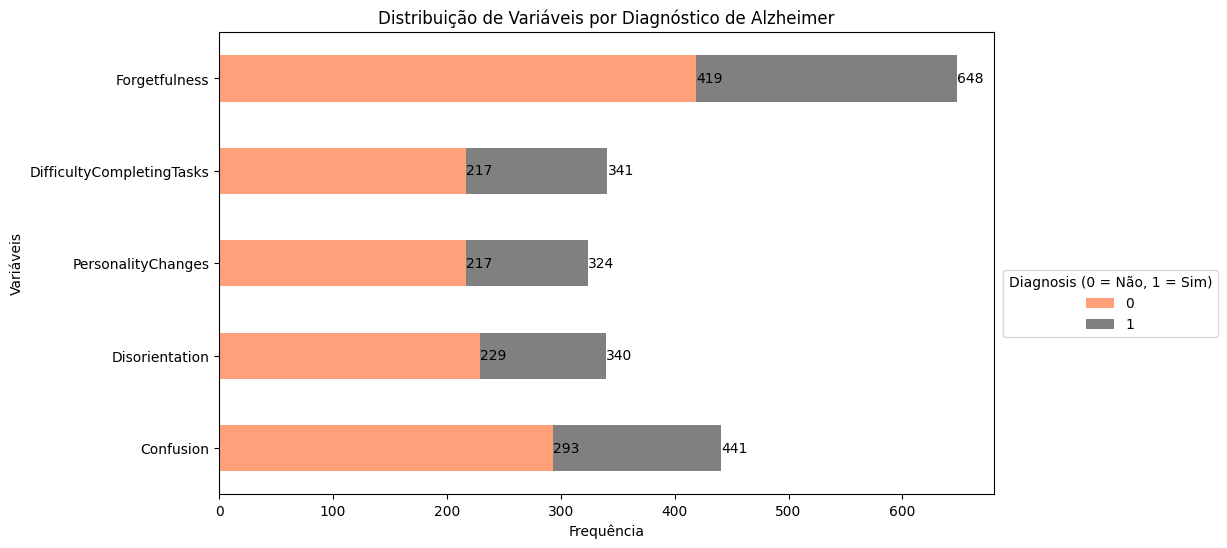

In [ ]:
colors = ['lightsalmon', 'gray']

ax = summary.T.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
plt.title('Distribuição de Variáveis por Diagnóstico de Alzheimer')
plt.xlabel('Frequência')
plt.ylabel('Variáveis')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
plt.legend(
    title='Diagnosis (0 = Não, 1 = Sim)',
    loc='upper center',
    bbox_to_anchor=(1.15, 0.5),
    ncol=1
)

plt.show()

#### Atividade Física x Diagnóstico

Nota-se aqui que a quantidade de atividade física é bem balanceada nos dois grupos

<ipython-input-86-85cd21f837cd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Diagnosis', y='PhysicalActivity', palette={'Sem Alzheimer': 'lightsalmon', 'Com Alzheimer': 'grey'})


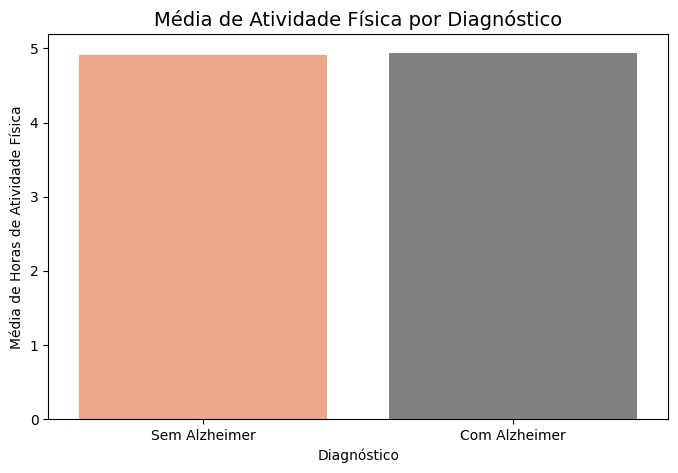

In [ ]:
# Calculando a média de atividade física para cada diagnóstico
means = df.groupby('Diagnosis')['PhysicalActivity'].mean().reset_index()

# Renomeando os rótulos para facilitar a interpretação
means['Diagnosis'] = means['Diagnosis'].map({0: 'Sem Alzheimer', 1: 'Com Alzheimer'})

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=means, x='Diagnosis', y='PhysicalActivity', palette={'Sem Alzheimer': 'lightsalmon', 'Com Alzheimer': 'grey'})
plt.title('Média de Atividade Física por Diagnóstico', fontsize=14)
plt.xlabel('Diagnóstico')
plt.ylabel('Média de Horas de Atividade Física')
plt.show()

#### Relação do histórico familiar e diagnóstico

A proporção entre as pessoas que apresentam um diagnóstico positivo é maior em pessoas que não tem um histórico familiar, o que resulta ser um resultado diferente do esperado.

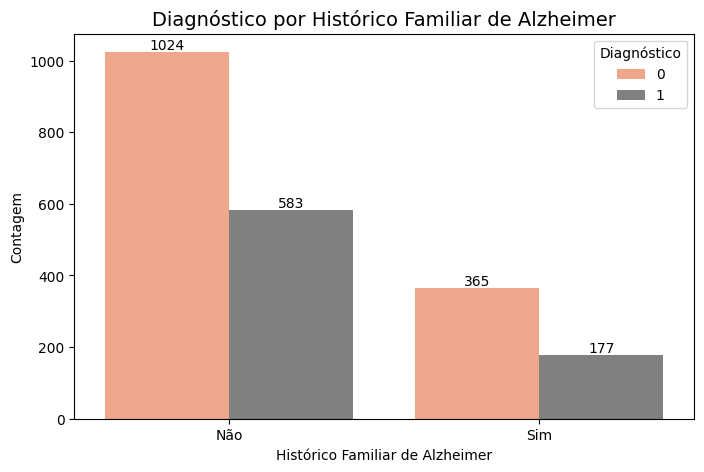

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='FamilyHistoryAlzheimers', hue='Diagnosis', palette=palette)
plt.title('Diagnóstico por Histórico Familiar de Alzheimer', fontsize=14)
plt.xlabel('Histórico Familiar de Alzheimer')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.legend(title='Diagnóstico')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.show()

#### Relação MMSE e Diagnóstico - Pontuação no Mini Exame do Estado Mental, variando de 0 a 30. Pontuações mais baixas indicam comprometimento cognitivo.

Olhando a coluna de diagnosticados, podemos ver que um alto MMSE é inversamente proporcional a quantidade de pessoas com a doença, mesmo que não seja um resultado muito significativo.

<ipython-input-93-ff47724f13fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Diagnosis', y='MMSE', palette=palette, jitter=True)


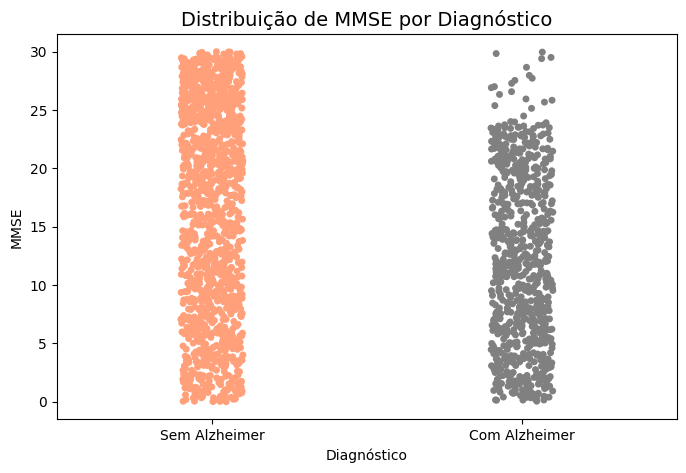

In [ ]:
palette = {'1': "gray", '0': "lightsalmon"}

plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='Diagnosis', y='MMSE', palette=palette, jitter=True)
plt.title('Distribuição de MMSE por Diagnóstico', fontsize=14)
plt.xlabel('Diagnóstico')
plt.ylabel('MMSE')
plt.xticks(ticks=[0, 1], labels=['Sem Alzheimer', 'Com Alzheimer'])
plt.show()

#### Qualidade de sono vs diagnóstico

Neste gráfico é possível ver uma diferença quando se trata a ter menos horas de sono, o número de diagnosticados é maior

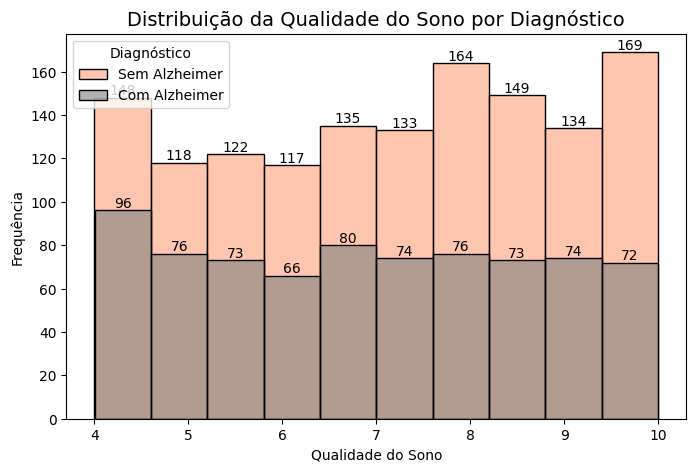

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df[df['Diagnosis'] == 0], x='SleepQuality', color='lightsalmon', label='Sem Alzheimer', kde=False, bins=10, alpha=0.6)
sns.histplot(data=df[df['Diagnosis'] == 1], x='SleepQuality', color='grey', label='Com Alzheimer', kde=False, bins=10, alpha=0.6)
# rótulos
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 5), textcoords='offset points')

plt.title('Distribuição da Qualidade do Sono por Diagnóstico', fontsize=14)
plt.xlabel('Qualidade do Sono')
plt.ylabel('Frequência')
plt.legend(title='Diagnóstico', labels=['Sem Alzheimer', 'Com Alzheimer'])
plt.show()

#### Consumo de Álcool por Diagnóstico

<ipython-input-98-9ed3e9827578>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diagnosis', y='AlcoholConsumption', palette=palette)


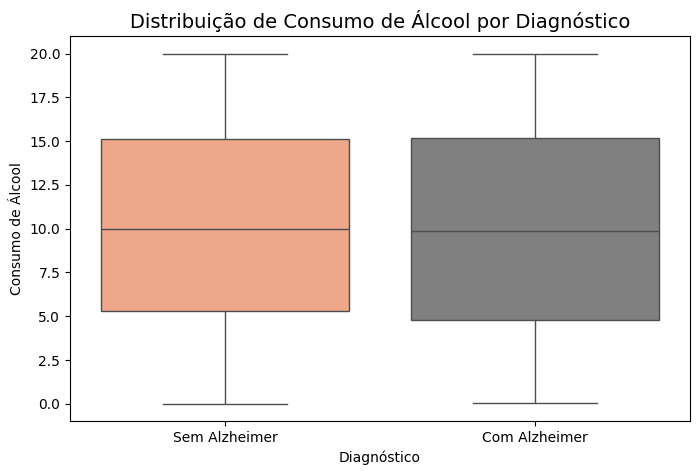

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Diagnosis', y='AlcoholConsumption', palette=palette)
plt.title('Distribuição de Consumo de Álcool por Diagnóstico', fontsize=14)
plt.xlabel('Diagnóstico')
plt.ylabel('Consumo de Álcool')
plt.xticks(ticks=[0, 1], labels=['Sem Alzheimer', 'Com Alzheimer'])  # Ajuste os rótulos conforme necessário
plt.show()

# 3. Pré-processamento

A coluna DoctorInCharge foi removida por não apresentar informações relevantes para o projeto. Além disso, algumas colunas categóricas foram excluídas para otimizar a performance do modelo. Não foi necessária a remoção de outliers, já que o dataset não os apresenta. Para as variáveis categóricas utilizadas, aplicou-se o método One-Hot Encoding.

Ajuste do IMC

In [ ]:
def bmi_ajustado(row):
  if row['BMI'] < 18.5:
    return 'Abaixo do Peso'
  elif 18.5 <= row['BMI'] <= 24.9:
    return 'Peso Normal'
  elif 25 <= row['BMI'] <= 29.9:
    return 'Sobrepeso'
  elif 30 <= row['BMI'] <= 34.9:
    return 'Obesidade Grau I'
  elif 35 <= row['BMI'] <= 39.9:
    return 'Obesidade Grau II'
  elif row['BMI'] > 40:
    return 'Obesidade Grau III'
  else:
    "Não informado"

#Aplicando a função ao dataframe
df['bmi_ajustado'] = df.apply(bmi_ajustado, axis=1)

In [ ]:
df['bmi_ajustado'].value_counts()


,count
bmi_ajustado,
Peso Normal,534
Obesidade Grau II,434
Sobrepeso,433
Obesidade Grau I,420
Abaixo do Peso,297


In [ ]:
df.drop(['DoctorInCharge'], axis=1, inplace=True)


In [ ]:
df.drop(['Ethnicity','EducationLevel','Forgetfulness','SystolicBP', 'DiastolicBP', 'CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides', 'AgeGroup'], axis=1, inplace=True)

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

print("Colunas Numéricas:")
for col in numerical_cols:
    print(f"- {col}")

df_numerical_cols= pd.DataFrame(numerical_cols, columns=["Colunas Numéricas"])

Colunas Numéricas:
- PatientID
- Age
- Gender
- BMI
- Smoking
- AlcoholConsumption
- PhysicalActivity
- DietQuality
- SleepQuality
- FamilyHistoryAlzheimers
- CardiovascularDisease
- Diabetes
- Depression
- HeadInjury
- Hypertension
- MMSE
- FunctionalAssessment
- MemoryComplaints
- BehavioralProblems
- ADL
- Confusion
- Disorientation
- PersonalityChanges
- DifficultyCompletingTasks
- Diagnosis


Correlação de Diagnosis com as demais colunas

In [ ]:
df_numerical = df[numerical_cols]

correlation_with_a = df_numerical.corr()['Diagnosis']

print(correlation_with_a)

PatientID                    0.041019
Age                         -0.005488
Gender                      -0.020975
BMI                          0.026343
Smoking                     -0.004865
AlcoholConsumption          -0.007618
PhysicalActivity             0.005945
DietQuality                  0.008506
SleepQuality                -0.056548
FamilyHistoryAlzheimers     -0.032900
CardiovascularDisease        0.031490
Diabetes                    -0.031508
Depression                  -0.005893
HeadInjury                  -0.021411
Hypertension                 0.035080
MMSE                        -0.237126
FunctionalAssessment        -0.364898
MemoryComplaints             0.306742
BehavioralProblems           0.224350
ADL                         -0.332346
Confusion                   -0.019186
Disorientation              -0.024648
PersonalityChanges          -0.020627
DifficultyCompletingTasks    0.009069
Diagnosis                    1.000000
Name: Diagnosis, dtype: float64


In [ ]:
non_numerical_cols = df.select_dtypes(exclude=['number']).columns

print("Colunas Categóricas:")
for col in non_numerical_cols:
    print(f"- {col}")

Colunas Categóricas:
- bmi_ajustado


In [ ]:
# valores para cada coluna
for col in df[non_numerical_cols]:
  print(f"**Valores para a coluna '{col}':**")
  print(df[col].value_counts())
  print("\n" + "="*50 + "\n")

**Valores para a coluna 'bmi_ajustado':**
bmi_ajustado
Peso Normal          534
Obesidade Grau II    434
Sobrepeso            433
Obesidade Grau I     420
Abaixo do Peso       297
Name: count, dtype: int64




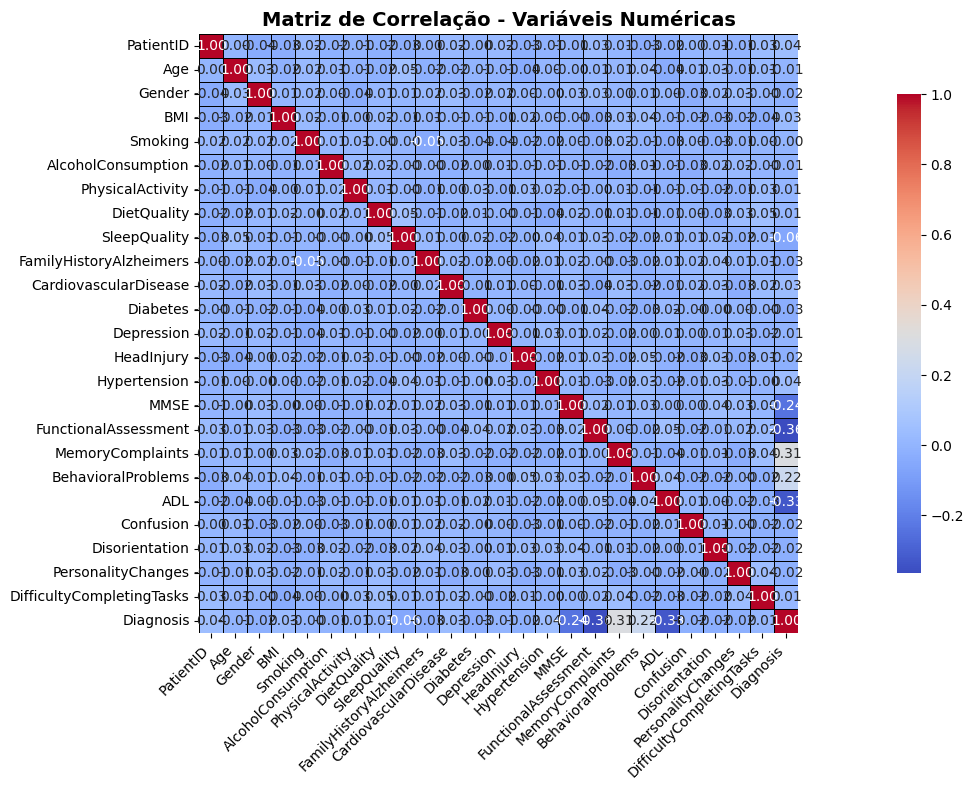

In [ ]:
# Selecionar apenas colunas numéricas, excluindo 'id'
# df_numerical_cols = df.drop(columns=['id']).select_dtypes(include=['float64', 'int64'])
df_numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
correlation_matrix = df_numerical_cols.corr()

# Criar o heatmap
plt.figure(figsize=(20, 8))  # Ajusta o tamanho da figura
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                      square=True, cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black')

plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
non_numerical_cols

Index(['bmi_ajustado'], dtype='object')

In [ ]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Diagnosis', 'bmi_ajustado'],
      dtype='object')

In [ ]:
# Converter variáveis categóricas para numéricas usando One-Hot Encoding
df = pd.get_dummies(df, columns=['bmi_ajustado'],  dtype=int)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
X = df.drop(['Diagnosis'], axis=1)
X = X.drop(['PatientID'], axis=1)
y = df['Diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.3,
    random_state=42
)

# 4. Modelagem

**RANDON FOREST**


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

TREINO (Modelo Inicial)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       972
           1       1.00      1.00      1.00       532

    accuracy                           1.00      1504
   macro avg       1.00      1.00      1.00      1504
weighted avg       1.00      1.00      1.00      1504



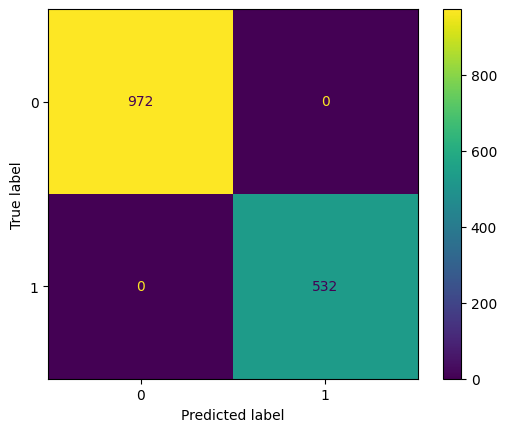

In [ ]:
print("TREINO (Modelo Inicial)")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

TESTE (Modelo Inicial)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       417
           1       0.94      0.90      0.92       228

    accuracy                           0.95       645
   macro avg       0.95      0.94      0.94       645
weighted avg       0.95      0.95      0.95       645



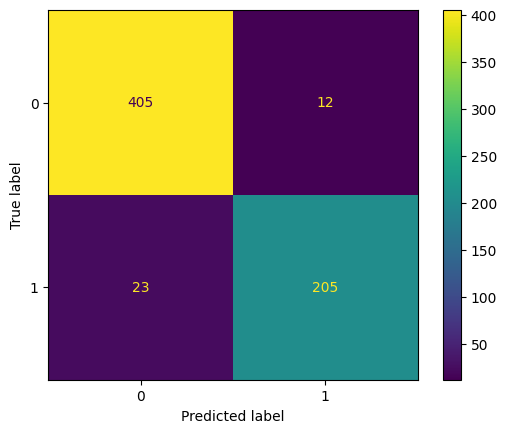

In [ ]:
print("TESTE (Modelo Inicial)")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
neg_class_count = sum(y == 0)  # Número de instâncias da classe negativa
pos_class_count = sum(y == 1)  # Número de instâncias da classe positiva
class_weight = {0: 1, 1: neg_class_count / pos_class_count}  # Pesos balanceados

In [ ]:
rf_weighted = RandomForestClassifier(
    n_estimators=100,
    class_weight=class_weight,  # Incluindo pesos balanceados
    random_state=42
)
rf_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.8276315789473685},
                       random_state=42)

In [ ]:
# 7. Avaliando o modelo com class_weight ajustado
y_pred_train_weighted = rf_weighted.predict(X_train)
y_pred_test_weighted = rf_weighted.predict(X_test)

TREINO (Modelo com Hiperparâmetros Ajustados)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       972
           1       1.00      1.00      1.00       532

    accuracy                           1.00      1504
   macro avg       1.00      1.00      1.00      1504
weighted avg       1.00      1.00      1.00      1504



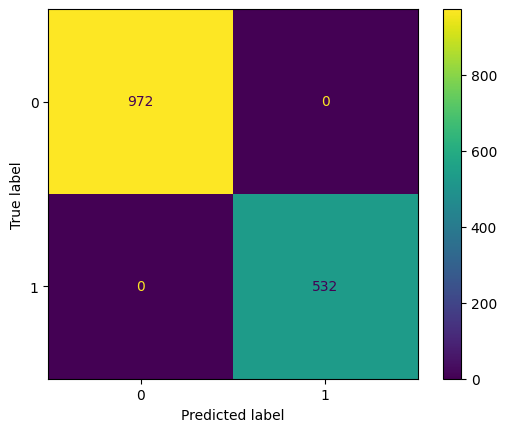

TESTE (Modelo com Hiperparâmetros Ajustados)
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       417
           1       0.94      0.89      0.92       228

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.94       645
weighted avg       0.94      0.94      0.94       645



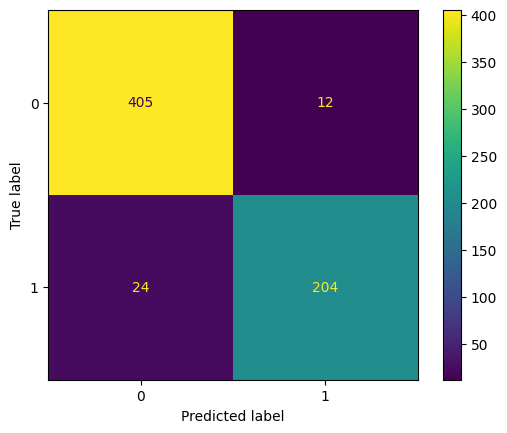

In [ ]:
print("TREINO (Modelo com Hiperparâmetros Ajustados)")
print(classification_report(y_train,y_pred_train_weighted ))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_weighted)
plt.show()

print("TESTE (Modelo com Hiperparâmetros Ajustados)")
print(classification_report(y_test, y_pred_test_weighted))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_weighted)
plt.show()

TREINO (Modelo com Hiperparâmetros Ajustados)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       972
           1       0.97      0.96      0.97       532

    accuracy                           0.98      1504
   macro avg       0.98      0.97      0.97      1504
weighted avg       0.98      0.98      0.98      1504



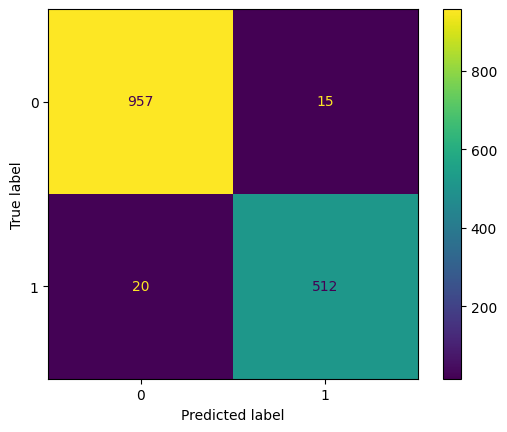

TESTE (Modelo com Hiperparâmetros Ajustados)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       417
           1       0.95      0.91      0.93       228

    accuracy                           0.95       645
   macro avg       0.95      0.94      0.95       645
weighted avg       0.95      0.95      0.95       645



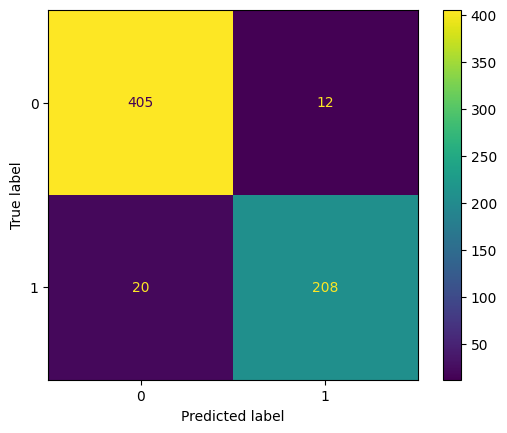

In [ ]:
# 8. Ajustando hiperparâmetros do Random Forest
rf_tuned = RandomForestClassifier(
    n_estimators=200,  # Mais árvores
    max_depth=10,  # Maior profundidade das árvores
    min_samples_split=5,  # Mínimo de amostras para realizar um split
    min_samples_leaf=2,  # Mínimo de amostras por folha
    class_weight=class_weight,  # Pesos balanceados
    random_state=42
)

# Treinando o modelo com hiperparâmetros ajustados
rf_tuned.fit(X_train, y_train)

# 9. Avaliando o modelo ajustado
y_pred_train_tuned = rf_tuned.predict(X_train)
y_pred_test_tuned = rf_tuned.predict(X_test)

print("TREINO (Modelo com Hiperparâmetros Ajustados)")
print(classification_report(y_train, y_pred_train_tuned))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_tuned)
plt.show()

print("TESTE (Modelo com Hiperparâmetros Ajustados)")
print(classification_report(y_test, y_pred_test_tuned))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tuned)
plt.show()

**LightGBM**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2110
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
TREINO (Modelo Inicial)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       972
           1       1.00      1.00      1.00       532

    accuracy                           1.00      1504
   macro avg       1.00      1.00      1.00      1504
weighted avg       1.00      1.00      1.00      1504



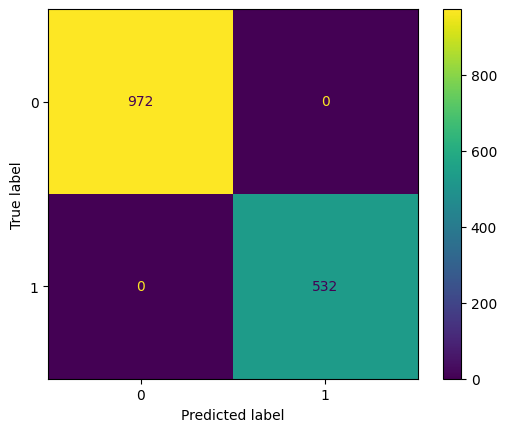

TESTE (Modelo com Hiperparâmetros Ajustados)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       417
           1       0.94      0.92      0.93       228

    accuracy                           0.95       645
   macro avg       0.95      0.94      0.94       645
weighted avg       0.95      0.95      0.95       645



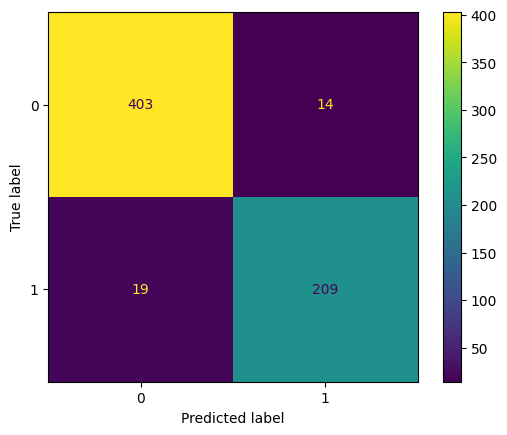

In [ ]:
# Construção do modelo
LGBM_model = lgb.LGBMClassifier(random_state=42)

# Treinamento do modelo
LGBM_model.fit(X_train, y_train)

# Predição do modelo
y_pred_train = LGBM_model.predict(X_train)
y_pred_test = LGBM_model.predict(X_test)

print("TREINO (Modelo Inicial)")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("TESTE (Modelo com Hiperparâmetros Ajustados)")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Definindo o modelo
model = lgb.LGBMClassifier()

# Espaço de parâmetros ajustado
param_dist = {
    'num_leaves': [15, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_data_in_leaf': [50, 100],
    'boosting_type': ['gbdt'],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Realizando a busca aleatória
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, cv=3, verbose=2, random_state=42)

# Ajustando o modelo
random_search.fit(X_train, y_train)

y_pred_train_hiper = random_search.best_estimator_.predict(X_train)
y_pred_test_hiper = random_search.best_estimator_.predict(X_test)

# Exibindo os melhores parâmetros
print("Melhores parâmetros encontrados:", random_search.best_params_)



A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

TREINO (Modelo Inicial)
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       972
           1       0.95      0.93      0.94       532

    accuracy                           0.96      1504
   macro avg       0.96      0.95      0.95      1504
weighted avg       0.96      0.96      0.96      1504



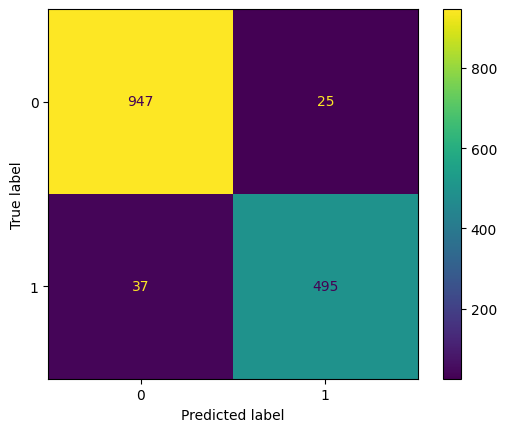

TESTE (Modelo com Hiperparâmetros Ajustados)
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       417
           1       0.95      0.93      0.94       228

    accuracy                           0.96       645
   macro avg       0.95      0.95      0.95       645
weighted avg       0.95      0.96      0.95       645



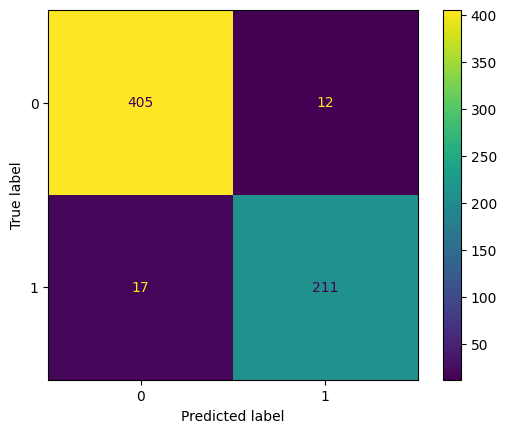

In [ ]:
print("TREINO (Modelo Inicial)")
print(classification_report(y_train, y_pred_train_hiper))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_hiper)
plt.show()

print("TESTE (Modelo com Hiperparâmetros Ajustados)")
print(classification_report(y_test, y_pred_test_hiper))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_hiper)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Configuração do StratifiedKFold para manter a proporção das classes
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
     # Ajustando para lidar com desequilíbrio
    class_weight='balanced',
    random_state=42
)

lgb_clf = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

# Avaliação usando validação cruzada
rf_scores = cross_val_score(rf, X, y, cv=kfold, scoring='f1_weighted')
lgb_scores = cross_val_score(lgb_clf, X, y, cv=kfold, scoring='f1_weighted')

print("Random Forest - Média F1 Score: {:.4f}".format(rf_scores.mean()))
print("LightGBM - Média F1 Score: {:.4f}".format(lgb_scores.mean()))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2110
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead

# 5. Conclusão


**Random Forest**

- Treinamento (Modelo Inicial):

Perfeito no conjunto de treino com acurácia, precisão, recall e F1-score = 1.00.

Sugere overfitting, pois o desempenho no conjunto de treino é perfeito, mas menor no teste.

- Teste (Modelo Inicial):

Acurácia = 0.95, bom desempenho.

F1-score para classe 1 = 0.92, ligeiramente inferior, mostrando que pode não capturar perfeitamente a classe minoritária.


- Teste (Modelo com Hiperparâmetros Ajustados):

Acurácia = 0.94, um pouco menor que o inicial.

F1-score para classe 1 = 0.92, desempenho semelhante.

**LightGBM**

- Treinamento (Modelo Inicial):

Assim como o Random Forest, apresenta métricas perfeitas no conjunto de treino (acurácia = 1.00), indicando possível overfitting.

- Teste (Modelo com Hiperparâmetros Ajustados):

Acurácia = 0.96, ligeiramente superior ao Random Forest.

F1-score para classe 1 = 0.94, melhor que o Random Forest.

Precision e Recall para classe 1 = 0.95 e 0.93, o que demonstra equilíbrio.

**Conclusão:**

A validação cruzada foi realizada para assegurar que o modelo geral não estava sofrendo overfitting. Para ambos os modelos, a média das métricas de desempenho (como precisão, recall e F1-score) foi bastante consistente, reforçando a robustez dos resultados. No entanto, o LightGBM se destacou ligeiramente, com uma leve vantagem no F1-score e uma acurácia mais alta no teste.

A escolha do modelo pode variar dependendo do trade-off desejado entre precisão e recall. O Random Forest mostrou-se ligeiramente mais conservador, com um recall mais alto para a classe 0 (não Alzheimer), enquanto o LightGBM teve um desempenho mais equilibrado em ambas as classes, sendo ideal para problemas com um bom equilíbrio entre precisão e recall, e também mais eficiente em termos de tempo de treinamento.